In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [4]:
print(tf.__version__)


2.5.0


In [5]:
data_dir = '../../assets/model_training'
os.listdir(data_dir)

['not_pizza', 'pizza']

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
import os
def replace(folder_path, old, new):
    for path, subdirs, files in os.walk(folder_path):
        for name in files:
            if(old.lower() in name.lower()):
                file_path = os.path.join(path,name)
                new_name = os.path.join(path,name.lower().replace(old,new))
                os.rename(file_path, new_name)

In [8]:
# replace('../../assets/images/fruit','.','f.')

In [9]:
# replace('../../assets/images/man','.','m.')
# replace('../../assets/images/woman','.','w.')
# replace('../../assets/images/people','.','ppl.')
# replace('../../assets/images/car','.','c.')
# replace('../../assets/images/vegetable','.','v.')
# replace('../../assets/images/animal','.','an.')
# replace('../../assets/images/airplane','.','ap.')
# replace('../../assets/images/pizza','.','p1.')
# replace('../../assets/images/cheese\ pizza','.','p2.')
# replace('../../assets/images/mushroom\ pizza','.','p3.')
# replace('../../assets/images/pepperoni\ pizza','.','p4.')











In [10]:
batch_size = 200
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.8,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 10867 files belonging to 2 classes.
Using 2174 files for training.
Found 10867 files belonging to 2 classes.
Using 2173 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['not_pizza', 'pizza']


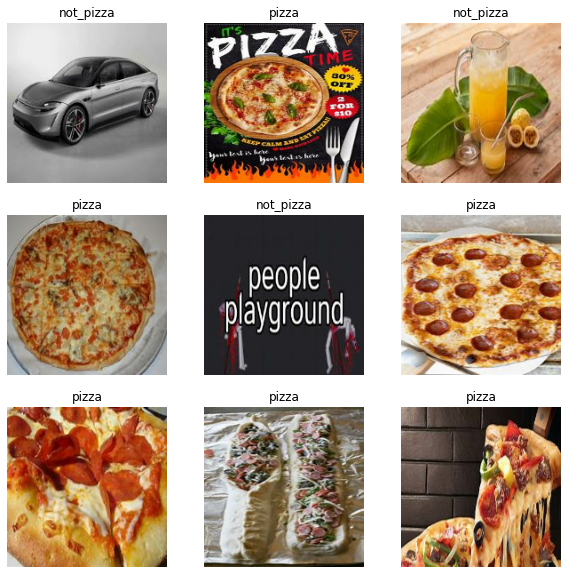

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [17]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', min_delta=.005, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [19]:
history = model.fit(
  train_ds,
  callbacks=[early_stop],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
11/11 [==============================] - 8s 336ms/step - loss: 0.9872 - accuracy: 0.5106 - val_loss: 0.6738 - val_accuracy: 0.6585
Epoch 2/50
11/11 [==============================] - 1s 121ms/step - loss: 0.6117 - accuracy: 0.7254 - val_loss: 0.5240 - val_accuracy: 0.7552
Epoch 3/50
11/11 [==============================] - 1s 117ms/step - loss: 0.5401 - accuracy: 0.7314 - val_loss: 0.5490 - val_accuracy: 0.7147
Epoch 4/50
11/11 [==============================] - 1s 117ms/step - loss: 0.4437 - accuracy: 0.8059 - val_loss: 0.4487 - val_accuracy: 0.7934
Epoch 5/50
11/11 [==============================] - 1s 115ms/step - loss: 0.3816 - accuracy: 0.8372 - val_loss: 0.3671 - val_accuracy: 0.8348
Epoch 6/50
11/11 [==============================] - 1s 117ms/step - loss: 0.3517 - accuracy: 0.8500 - val_loss: 0.3587 - val_accuracy: 0.8412
Epoch 7/50
11/11 [==============================] - 1s 118ms/step - loss: 0.3226 - accuracy: 0.8675 - val_loss: 0.3471 - val_accuracy: 0.8523
Epoch 

In [20]:
human = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/Mzc5Njk1Ng.jpeg', target_size=(180, 180))
human = np.asarray(human).reshape(-1, 180, 180, 3)
print(model.predict_classes(human)[0])
pred = model.predict(human)


FileNotFoundError: [Errno 2] No such file or directory: '../../assets/images/testing/Mzc5Njk1Ng.jpeg'

In [ ]:
pred.argmax(axis=-1)

array([0], dtype=int64)

In [ ]:
pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/ismymodelanygood.jpg', target_size=(180, 180))
pizza = np.asarray(pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(pizza)[0])
pred_pizza = model.predict(pizza)


1


In [ ]:
model.save('./assets/model1.h5')


In [ ]:
model = keras.model.load_model('./assets/model1.h5')

In [9]:
green_ball = tf.keras.preprocessing.image.load_img('../../assets/images/testing/green_ball.jpg', target_size=(180, 180))
green_ball = np.asarray(green_ball).reshape(-1, 180, 180, 3)
print(model.predict_classes(green_ball)[0])
pred_pizza = model.predict(green_ball)

0


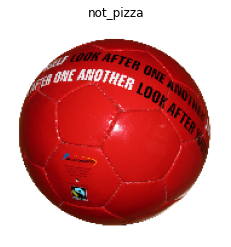

In [26]:
red_ball = tf.keras.preprocessing.image.load_img('../../assets/model_testing/red_ball.jpg', target_size=(180, 180))
class_labels = ['not pizza','pizza']
red_ball = np.asarray(red_ball).reshape(-1, 180, 180, 3)

plt.title(class_names[model.predict_classes(red_ball)[0]])
plt.axis('off')
plt.imshow(red_ball[0]);



In [24]:
pizza = tf.keras.preprocessing.image.load_img('../../assets/model_testing/pizza.jpg', target_size=(180, 180))
class_labels = ['not pizza','pizza']
pizza = np.asarray(pizza).reshape(-1, 180, 180, 3)

plt.title(class_names[model.predict_classes(pizza)[0]])
plt.axis('off')
plt.imshow(pizza[0]);

0


In [25]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/Star-Pizza-Facebook.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])
pred_pizza = model.predict()

1


In [5]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/pie_hard.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])


1


In [11]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/Cherry-Pie.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])

1


In [12]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/berry-pie.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])

1


In [13]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/shepherds-pie.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])

1
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [8]:
star_pizza = tf.keras.preprocessing.image.load_img('../../assets/images/testing/shep-hard.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])

1


In [15]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/shepie.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])

1


In [10]:
star_pizza = tf.keras.preprocessing.image.load_img(r'../../assets/images/testing/pizza-frittata.jpg', target_size=(180, 180))
star_pizza = np.asarray(star_pizza).reshape(-1, 180, 180, 3)
print(model.predict_classes(star_pizza)[0])

1


In [4]:
model = tf.keras.models.load_model('./assets/model1.h5')


In [27]:
preds = model.predict_classes(val_ds)
preds

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
type(val_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [29]:
y = np.concatenate([y for x, y in val_ds], axis=0)


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y,preds))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1203
           1       0.93      0.91      0.92       970

    accuracy                           0.93      2173
   macro avg       0.93      0.92      0.93      2173
weighted avg       0.93      0.93      0.93      2173



In [31]:
preds

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [1]:
import seaborn as sns


c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\ezubkoff.97LM7F3-\Desktop\dell-2-capstone\.venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
